# Exploratory data analysis of the Disney Datasets

## Foreword

This work shows some exploratory data analysis for the Disney dataset located [here](https://data.world/kgarrett/disney-character-success-00-16). This document investigates if the number of movies made in a year equates to more money at the box office for this an histogram plot of the number of movies made from 1937 to 2016 under the disney studios is compared with the inflation adjusted gross for the same time duration. 
This work also tries to find a relationship between the total revenue and the total gross from the movies alone if there exists any between the years of 1991 and 2016.

# Introduction

## Questions of interests

This project analyses the dependencies on the gross collection based on the number of movies released from the year 1937 to 2016. 
The project also tries to find a relationship between the total revenue and total gross from movies alone. 

Every company has revenue goals to improve the performance by improving gross or net profit. By answering the above questions, the Disney company could strategize accordingly to meet their revenue goals, as income from the movies and no of movies made each year(investment in the movies) are some of the factors that affect the revenue.

## Dataset Description

The below description is obtained from [here]('https://en.wikipedia.org/wiki/Main_Page').

The Disney company is known for its film studio division, The Walt Disney Studios, which includes Walt Disney Pictures, Walt Disney Animation Studios, Pixar, Marvel Studios, Lucasfilm, 20th Century Studios, 20th Century Animation, and Searchlight Pictures. Disney's other main business units include divisions in television, broadcasting, streaming media, theme park resorts, consumer products, publishing, and international operations. 

The datasets obtained for this project was from [data.world](https://data.world/kgarrett/disney-character-success-00-16), which follows a Creative Common Attribution 4.0 International License.<br>
The avaliable tables are: 
* disney-characters.csv
* disney-director.csv 
* disney-voice-actors.csv 
* disney_revenue_1991-2016.csv 
* disney_movies_total_gross.csv<br>

Each table is stored in a csv file and for this project the following tables will be used. 
* disney_revenue_1991-2016.csv <br>

This dataset gives the annual gross revenues of the Walt Disney Company for the years 1991 to 2016.
* disney_movies_total_gross.csv <br>

This dataset gives information regarding the gross collection from movies made under Disney for the years 1937 to 2016. 

# Methods and Results

Since one of the objects of the work is to find a relationship between the number of movies made each year and the inflation adjusted gross collection. In the disney_movies_total_gross dataset the inflation_adjusted_gross is given as a string value, a function called str_replace_conv is used which replaces the symbols '$' and ',' and changes the string number to floating point value and divides it by 1000000 to return the value in per millions. 

The second object of the work is to find if there is any correlation between total revenue and the total gross collection from the movies. For this the total_gross column is changed using the str_replace_conv method to get the per million value. and the dataframe is filtered to get the value of total gross for the years of 1991 to 2016 and then the newly obtained dataframe is merged with the revenue dataframe. and the scatter plot is obtained for total_gross vs total revenue to find the relationship.


However, before moving further, let us import the libraries for further analysis.

In [1]:
import pandas as pd
import numpy as np
import altair as alt

Importing str_replace_conv to replace the string and convert it to a floating point value.

In [2]:
from str_replace_conv import str_replace_conv

Lets see how the disney_revenue table looks like

In [3]:
disney_revenue = pd.read_csv('data/disney_revenue_1991-2016.csv')
disney_revenue.head()

,Year,Studio Entertainment[NI 1],Disney Consumer Products[NI 2],Disney Interactive[NI 3][Rev 1],Walt Disney Parks and Resorts,Disney Media Networks,Total
0,1991,2593.0,724.0,NaN,2794.0,NaN,6111
1,1992,3115.0,1081.0,NaN,3306.0,NaN,7502
2,1993,3673.4,1415.1,NaN,3440.7,NaN,8529
3,1994,4793.0,1798.2,NaN,3463.6,359,10414
4,1995,6001.5,2150.0,NaN,3959.8,414,12525


Lets get more info about the disney_revenue table

In [4]:
disney_revenue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 7 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             26 non-null     int64  
 1   Studio Entertainment[NI 1]       25 non-null     float64
 2   Disney Consumer Products[NI 2]   24 non-null     float64
 3   Disney Interactive[NI 3][Rev 1]  12 non-null     float64
 4   Walt Disney Parks and Resorts    26 non-null     float64
 5   Disney Media Networks            23 non-null     object 
 6   Total                            26 non-null     int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 1.5+ KB


The revenue table has 26 rows and 7 columns. 
There is yearly revenue information for  Studio Entertainment, Disney Consumer Products, Disney Interactive, Walt Disney Parks and Resorts, Disney Media Networks along with the total revenue for the years 1991 to 2016.

Lets see how the disney_total table looks like

In [5]:
disney_total = pd.read_csv('data/disney_movies_total_gross.csv')
disney_total.head()

,movie_title,release_date,genre,MPAA_rating,total_gross,inflation_adjusted_gross
0,Snow White and the Seven Dwarfs,"Dec 21, 1937",Musical,G,"$184,925,485","$5,228,953,251"
1,Pinocchio,"Feb 9, 1940",Adventure,G,"$84,300,000","$2,188,229,052"
2,Fantasia,"Nov 13, 1940",Musical,G,"$83,320,000","$2,187,090,808"
3,Song of the South,"Nov 12, 1946",Adventure,G,"$65,000,000","$1,078,510,579"
4,Cinderella,"Feb 15, 1950",Drama,G,"$85,000,000","$920,608,730"


Lets get more info about the disney_total table

In [6]:
disney_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579 entries, 0 to 578
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   movie_title               579 non-null    object
 1   release_date              579 non-null    object
 2   genre                     562 non-null    object
 3   MPAA_rating               523 non-null    object
 4   total_gross               579 non-null    object
 5   inflation_adjusted_gross  579 non-null    object
dtypes: object(6)
memory usage: 27.3+ KB


The table for the total collection has 579 rows and 6 columns. The table gives how much money each movie collected along with inflation adjusted collection.
The columns are movie_title, release_date, genre, MPAA_rating, Total_gross, inflation_adjusted_gross for the years from 1937 to 2016.

Since the year information is needed for doing the analysis on the disney_total table, the 'release_date' column would be converted into a datetime64 data type from an object data type as shown.

In [7]:
disney_total = pd.read_csv('data/disney_movies_total_gross.csv',parse_dates = ['release_date'])
disney_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579 entries, 0 to 578
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   movie_title               579 non-null    object        
 1   release_date              579 non-null    datetime64[ns]
 2   genre                     562 non-null    object        
 3   MPAA_rating               523 non-null    object        
 4   total_gross               579 non-null    object        
 5   inflation_adjusted_gross  579 non-null    object        
dtypes: datetime64[ns](1), object(5)
memory usage: 27.3+ KB


In [8]:
new_disney_total = disney_total.assign(release_date = pd.to_datetime(disney_total['release_date']))
new_disney_total = new_disney_total.assign(year = new_disney_total['release_date'].dt.year)
new_disney_total.head()

,movie_title,release_date,genre,MPAA_rating,total_gross,inflation_adjusted_gross,year
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,"$184,925,485","$5,228,953,251",1937
1,Pinocchio,1940-02-09,Adventure,G,"$84,300,000","$2,188,229,052",1940
2,Fantasia,1940-11-13,Musical,G,"$83,320,000","$2,187,090,808",1940
3,Song of the South,1946-11-12,Adventure,G,"$65,000,000","$1,078,510,579",1946
4,Cinderella,1950-02-15,Drama,G,"$85,000,000","$920,608,730",1950



After converting  ‘release_date’ into a datetime64 data type, for further analysis the year information is extracted from the release_date and stored in a column named year as shown. 


In [9]:
disney_title_count = new_disney_total.drop(columns = ['release_date','genre','MPAA_rating','total_gross'])
disney_title_count[['year','movie_title','inflation_adjusted_gross']]
str_replace_conv(disney_title_count,'inflation_adjusted_gross')
disney_title_count = disney_title_count.groupby('year').sum().loc[:,'inflation_adjusted_gross']
disney_title_count = disney_title_count.reset_index()
disney_title_count.head()

,year,inflation_adjusted_gross
0,1937,5228.953251
1,1940,4375.319860
2,1946,1078.510579
3,1950,920.608730
4,1954,528.279994


The inflation_adjusted_gross is converted into a floating point value using the str_replace_conv function.

In [10]:
yearly_gross_plot = alt.Chart(disney_title_count, width=800, height = 500).mark_bar().encode(
x=alt.X('year:Q',title = 'Year'),
y=alt.Y('inflation_adjusted_gross:Q',title = 'Total Gross (in Millions)'),
).properties(title = 'Movie Gross Through the Years')
yearly_gross_plot

alt.Chart(...)

The plot above gives the gross money collected per year from the year 1937 to 2016.

In [11]:
movie_count_plot = alt.Chart(new_disney_total, width= 800, height= 500).mark_bar().encode(
x=alt.X('year:Q',bin=alt.Bin(maxbins=80), title = 'Year'),
y=alt.Y('count():Q', title = 'Number Movies Made')
).properties(title = 'Histogram of the Movies Made Each Year')
movie_count_plot

alt.Chart(...)

The plot above is an histogram that shows the number of movies made each year.

On analysing both the plots it is seen that there is no direct relationship between the amount of money a movie makes to the number of movies made in a year. This indicates that the gross collection does not directly depend on the number of movies made each year. 

For analysing how the revenue is affected by the amount of money movies made each year collects, let's take a look at the dataset disney_total and merge it with the revenue table. Since the revenue table is available for the years of 1991 to 2016, The disney_total table is filtered for 1991 to 2016 as well. 

For merging with the revenue table, the dataframe is filtered for total_gross and year data alone.

In [12]:
new_disney_mod = new_disney_total.drop(columns=['movie_title','genre','release_date','MPAA_rating','inflation_adjusted_gross'])
new_disney_mod.head()

,total_gross,year
0,"$184,925,485",1937
1,"$84,300,000",1940
2,"$83,320,000",1940
3,"$65,000,000",1946
4,"$85,000,000",1950


The total_gross column value is changed to floating values using the str_replace_conv function. And for this analysis, the data is filtered for the years from 1991 to 2016. 

In [13]:
str_replace_conv(new_disney_mod,'total_gross')
disney_91_16 = new_disney_mod[new_disney_mod['year'] >=1991]
disney_91_16.reset_index(drop=True, inplace=True)

Once the converted dataframe is obtained, the grouping of the data is done for each year.

In [14]:
movie_gross_yearly = disney_91_16.groupby(by='year')
movie_gross_yearly = movie_gross_yearly.sum().loc[:,'total_gross'].reset_index()
movie_gross_yearly.head()

,year,total_gross
0,1991,647.050340
1,1992,854.534354
2,1993,701.652109
3,1994,1092.255030
4,1995,1131.964294


Following code merges the movie_gross_yearly with the disney_revenue dataframe

In [15]:
disney_all = disney_revenue.merge(movie_gross_yearly, left_on ='Year',right_on = 'year')
disney_all.head()

,Year,Studio Entertainment[NI 1],Disney Consumer Products[NI 2],Disney Interactive[NI 3][Rev 1],Walt Disney Parks and Resorts,Disney Media Networks,Total,year,total_gross
0,1991,2593.0,724.0,NaN,2794.0,NaN,6111,1991,647.050340
1,1992,3115.0,1081.0,NaN,3306.0,NaN,7502,1992,854.534354
2,1993,3673.4,1415.1,NaN,3440.7,NaN,8529,1993,701.652109
3,1994,4793.0,1798.2,NaN,3463.6,359,10414,1994,1092.255030
4,1995,6001.5,2150.0,NaN,3959.8,414,12525,1995,1131.964294


The revenue consists of revenues from various subsidiaries under Disney, When each of these are observed individually, it can be seen that there are multiple columns with revenue values missing. Let's take a look at each of these individually.

In [16]:
disney_all[disney_all["Studio Entertainment[NI 1]"].isnull()]

,Year,Studio Entertainment[NI 1],Disney Consumer Products[NI 2],Disney Interactive[NI 3][Rev 1],Walt Disney Parks and Resorts,Disney Media Networks,Total,year,total_gross
5,1996,NaN,NaN,NaN,4502.0,"4,142",18739,1996,1134.044721


For studio entertainment the observation for the year 1996 is missing.

In [17]:
disney_all[disney_all['Disney Consumer Products[NI 2]'].isnull()]

,Year,Studio Entertainment[NI 1],Disney Consumer Products[NI 2],Disney Interactive[NI 3][Rev 1],Walt Disney Parks and Resorts,Disney Media Networks,Total,year,total_gross
5,1996,NaN,NaN,NaN,4502.0,"4,142",18739,1996,1134.044721
25,2016,9441.0,NaN,NaN,16974.0,23689,55632,2016,2873.393105


For Disney Consumer Products the observations for the years 1996 and 2016 are missing. 

In [18]:
disney_all[disney_all['Disney Interactive[NI 3][Rev 1]'].isnull()]

,Year,Studio Entertainment[NI 1],Disney Consumer Products[NI 2],Disney Interactive[NI 3][Rev 1],Walt Disney Parks and Resorts,Disney Media Networks,Total,year,total_gross
0,1991,2593.0,724.0,NaN,2794.0,NaN,6111,1991,647.050340
1,1992,3115.0,1081.0,NaN,3306.0,NaN,7502,1992,854.534354
2,1993,3673.4,1415.1,NaN,3440.7,NaN,8529,1993,701.652109
3,1994,4793.0,1798.2,NaN,3463.6,359,10414,1994,1092.255030
4,1995,6001.5,2150.0,NaN,3959.8,414,12525,1995,1131.964294
5,1996,NaN,NaN,NaN,4502.0,"4,142",18739,1996,1134.044721
10,2001,7004.0,2590.0,NaN,6009.0,9569,25790,2001,881.246784
11,2002,6465.0,2440.0,NaN,6691.0,9733,25360,2002,1159.269061
12,2003,7364.0,2344.0,NaN,6412.0,10941,27061,2003,1564.114393
13,2004,8713.0,2511.0,NaN,7750.0,11778,30752,2004,1157.899879


For Disney Interactive, the observations of revenue for the years 1991 to 1996, 2001 to 2007 and for the year 2016 are missing.

In [19]:
disney_all[disney_all['Walt Disney Parks and Resorts'].isnull()]

,Year,Studio Entertainment[NI 1],Disney Consumer Products[NI 2],Disney Interactive[NI 3][Rev 1],Walt Disney Parks and Resorts,Disney Media Networks,Total,year,total_gross


Looking into the null values for Walt Disney Parks and Resorts, All the observations are made available from the data.

In [20]:
disney_all[disney_all['Disney Media Networks'].isnull()]

,Year,Studio Entertainment[NI 1],Disney Consumer Products[NI 2],Disney Interactive[NI 3][Rev 1],Walt Disney Parks and Resorts,Disney Media Networks,Total,year,total_gross
0,1991,2593.0,724.0,NaN,2794.0,NaN,6111,1991,647.050340
1,1992,3115.0,1081.0,NaN,3306.0,NaN,7502,1992,854.534354
2,1993,3673.4,1415.1,NaN,3440.7,NaN,8529,1993,701.652109


For Disney media networks, observations are missing for the years 1991 to 1993.

Some of the observations for revenues from different units under Disney are missing. This means that the plots and analysis obtained would not be fully accurate as the value for the total revenue depends on these missing values as well.

The Scatter Plot below gives the dependency of the total gross from movies on the total revenue.
Two more bar graphs are obtained to observe yearly variation in both the variables for which the Scatter plot is obtained to get a better picture.

In [21]:
#Finding a relationship between the total gross from movies alone and total revenue from 1991 to 2016
movie_studio_plot = alt.Chart(disney_all, width =400, height = 300).mark_circle().encode(
    x=alt.X('total_gross:Q',title ='Total Gross from Movies'),
    y=alt.Y('Total:Q', title = 'Total Revenue')
).properties(title='Scatter Plot of Total Gross from Movies Vs Total Revenue')
movie_studio_plot.display()

movie_gross_plot = alt.Chart(disney_all, width= 400, height= 300).mark_bar().encode(
x=alt.X('year:Q', title = 'Year'),
y=alt.Y('total_gross:Q', title = 'Total Gross from movies')
).properties(title = 'Total Gross from Movies Vs Year')
movie_gross_plot.display()

overall_revenue_plot = alt.Chart(disney_all, width= 400, height= 300).mark_bar().encode(
x=alt.X('year:Q', title = 'Year'),
y=alt.Y('Total:Q', title = 'Total Revenue' )
).properties(title = 'Total Revenue Vs Year')
overall_revenue_plot.display()


alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

From the above plot it can be seen that the gross collection from movies has an impact on the total revenue.  

# Discussions

In this work, an exploratory data analysis was done on the disney dataset to answer the following questions.<br>
1. The dependencies of the number of movies made to the gross collection obtained from the movies.<br>
2. How the collection from the movie impacts the total revenue of the Walt Disney Company.

After doing the analysis, it is found that there is an increase in movies being made from the year 1937 to 2016, It can be seen that there are a lot more movies being made in recent years than before, with a considerable increase in movies being made in the 90s. But it can be seen that more movies do not translate into more gross collections at the box office. There may be different factors that affect the gross collection from movies than the amount of movies being made each year.<br>

By looking at the scatterplot of total gross Vs total revenue, it can be observed that there is a positive correlation between the revenue of the Walt Disney Company with the money collected from the movies alone. The amount of correlation that exists between the two variables can not be concluded from the given data alone as there are many values missing that make up the total revenue. But, it can be seen that the total gross collection from movies is one of the major revenue sources for disney.<br>

For the data set for gross collection, further analysis can be done by finding out the various factors that affect the box office outcome. Analysis can be done on the same dataset for gross collection, if the Genre , Rating of the movie has an impact on the gross collection. Also, it would be interesting to do analysis on the ‘disney-characters.csv’, ‘disney-director.csv’, ‘disney-voice-actors.csv’ and find the impact on the box office collection.<br>

Further analysis on the Revenue data set can be made by obtaining the missing values for the revenue dataframe, if possible. Also, analysis can be done on how other units contribute to the revenue of Walt Disney Company.<br>

This project report has provided a small insight into the effect of the movies and their collection on the revenue of the Disney Company. As mentioned above, better analysis can be obtained by considering the rest of the available data sets and by filling in the missing values. 




# References

Not all the work in this notebook is original. Some parts were borrowed from online resources. I take no credit for parts that are not mine. They were solely used for illustration purposes.

## Resources Used
* [data.world](https://data.world/kgarrett/disney-character-success-00-16) <br>
The datasets used in this project are obtained from data.world.
* [Wikipedia](https://en.wikipedia.org/wiki/The_Walt_Disney_Company) <br>
The information regarding the Walt Disney Company is obtained from Wikipedia.

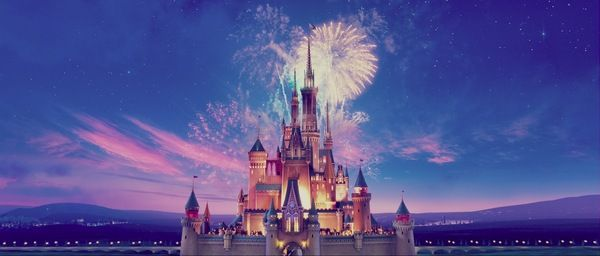

The image obtained from [here](https://in.pinterest.com/pin/660269995370406576/).